<h2>Restauración de Imágenes</h2>
Sea $f(x,y)$ una imágen en escala de grises, que ha sido modificada, alterada la calidad de la imágen.

Por ejemplo:
* Mover una cámara cuando se toma una fotografía.
* Modificaciones geométricas.

Adicionalmente, la imágen puede contener un tipo de ruido aditivo. En resumen, una imáegn $f(x,y)$ se puede modificar de dos maneras:
* Distorción geométrica o movimiento.
* Ruido aditivo.

$$f(x,y) \rightarrow h(x,y) \rightarrow ruido \rightarrow Restauracion \rightarrow \tilde{f}(x,y)$$

Matemáticamete, la degradación de una imágen se describe de las siguientes maneras:
* $g(x,y) = f(x,y) \ast h(x,y) + n(x,y$
* $g(x,y) = h(x,y) \cdot f(x,y) + n(x,y$
En el primer caso, por el teorema de convolución que vimos la lección anterior,
$$G(u,v) = F(u,v) \cdot H(u,v)+ N(u,v)$$
donde G,F,H,N son las DFT-2D de g,f,h,n.

<h3>Filtro de restauración</h3>
Es un filtro para poder reconstruir la imágen $f(x,y)$ de la imágen $g(x,y)$.

Normalmente, el filtro de restauración sigue los siguientes pasos:
* Recolectar información del proceso de degradación. Utilizando muestras.
* Usando la información recolectada mediante el proceso de muestreo, construimos un modelo de degradación (función $D$).
* Desaroolar un modelo inverso (función $D^{-1}$) en forma de filtro.

<h3>Ruido en una imágen</h3>
El ruido en una imágen es una funcion $n(x,y)$ que contamina una imágen original. El ruido es algo es algo no deseado que altera el comportamiento de la imagen original.

Nosotros consideraremos el ruido como una variable aleatoria, cuya funcion de probabilidad de densidad (FPD) describe la forma y distribución de los valores de las variables aleatorias.

Nota: Trabajaremos nosotros en el ruido aplicado en el dominio espacial.



<h2>Ejemplo 1: Demostración de ruido simple</h2>

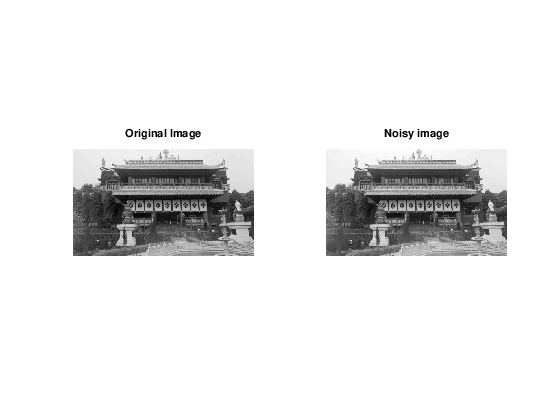

In [6]:
clc; clear;

pkg load image

A = imread('img/edificio_china.jpg');
A = im2double(A);
[m,n] = size(A);
subplot(1,2,1)
imshow(A)
title('Original Image')

% Uniform distribution noise M = A + N.
% With N = [0,1].
% Note: Use images in float format.
N = rand(); % Randomly generated matrix with values in interval [0,1]
M = A + N;
M = im2uint8(M);
subplot(1,2,2)
imshow(M)
title('Noisy image')

<h2> Tipos de ruido</h2>
<h3>Gausiano</h3>
<h4>Función de densidad</h4>
$$f_{x}(z) = \frac{1}{\sqrt{2 \pi \sigma}}\cdot e^{-\frac{(z-\bar{z})^{2}}{2 \sigma^{2}}}$$

$\bar{z}$ es el valor esperado.
$\sigma$ es la desviación estandar.

<h4>Función acumulada</h4>
Si $\bar{z} = 0$ y $\sigma = 1$.
$$\Theta(z) =  \frac{1}{\sqrt{2 \pi}}\int_{-\infty}^{z}e^{-\frac{x^{2}}{2}}dx$$

Para generar una matriz aleatoria, se utiliza el comando randn(m,n).

<h3>Uniforme</h3>
<h4>Función de densidad</h4>
\[   
f_{x}(z) = 
     \begin{cases}
       \frac{1}{b-a},  &\quad\text{si $z \in [a,b]$}\\
       \text{0,} &\quad\text{de otra manera.} \\ 
     \end{cases}
\]
<h4>Función acumulada</h4>
\[   
\Theta(z) = 
     \begin{cases}
       0,  &\quad\text{si z < a}\\
       \frac{z-a}{b-a} &\quad\text{si $z \in [a,b]$} \\
       1 &\quad\text{de otra manera.} \\
     \end{cases}
\]

Para generar una matriz aleatoria, se utiliza el comando rand(m,n).


<h3>Rayleigh</h3>
<h4>Función de densidad</h4>
$$f_{x}(z) = \frac{z}{\sigma^{2}}e^{\frac{-z^{2}}{z\sigma^{2}}}$$
$\sigma$ es un parámetro.

<h4>Función acumulada</h4>
$$\Theta(z) = 1 - e^{\frac{-x^{2}}{2\sigma^{2}}}$$

Para generar una matriz aleatoria, se requiere de una técnica numérica.

<h3>Exponencial</h3>
<h4>Función de densidad</h4>
\[   
f_{x}(z) = 
     \begin{cases}
       \alpha e^{-\alpha z},  &\quad\text{si $z \geq 0$}\\
       0 &\quad\text{de otra manera.} \\
     \end{cases}
\]
$\alpha$ es un parámetro.

<h4>Función acumulada</h4>
$$\Theta(z) = 1-e^{\alpha x}$$

Para generar una matriz aleatoria, se requiere de una técnica numérica.

<h3>Sal y pimienta</h3>
<h4>Función de densidad</h4>
\[   
f_{x}(z) = 
     \begin{cases}
       P_{p},  &\quad\text{si z = p}\\
       P_{s},  &\quad\text{si z = s}\\
       0 &\quad\text{$z \neq p$ y $z \neq s$.} \\
     \end{cases}
\]

<h4>Función acumulada</h4>
No se conoce.

Tarea: Definir una manera de calcular una matríz aleatoria siguiendo la distribución de sal y pimienta.

<h2>Tarea: Programar una función que construya una matriz aleatoria sal y pimienta.</h2>

<h2>Método numérico para generación de matrices aleatorias siguiendo una distribución.</h2>
Para los ruido de Rayleigh y Exponencial, GNUOctave no tiene una implementación para genar matrices aleatorias siguiendo una distribución de Rayleigh o Exponencial.

Un proceso numérico para generar un valor aleatorio, conociendo la función acumulada de distribución es el siguiente:

* Generar un valor aleatorio con distribución uniforme, entre [0,1]. Sea este número $x_{i}$.
* $z_{i} = F^{-1}(x_{i})$, donde F es la función de distribución acumulada. Donde, $z_{i}$ es una aproximación de una variable aleatoria que sigue una función de densidad f, cuya función acumulada es F.

<h3>Ejemplo: Función exponencial.</h3>
$$\Theta(z) = 1 - e^{-\alpha z}$$
$$y = 1 - e^{-\alpha z}$$
$$e^{-\alpha z} = 1 - y$$
$$-\alpha z = ln(1 - y)$$
$$z = \frac{ln(1 - y)}{-\alpha}$$
$$\rightarrow \Theta^{-1}(x) = -\frac{1}{\alpha}ln(1-x)$$
con $y \in ]0,1[$.

Para crear una variable aleatoria con una distribución exponencial, realizamos lo siguiente.
* Generar un valor entre 0,1 : x = rand(1).
* $z = \Theta^{-1}(x) = -\frac{1}{\alpha}ln(1-x)$

In [14]:
function Z=rand_e(m, n, alpha)
    % Generates a random matrix of mxn
    % following exponential distribution.
    U = rand(m,n);
    Z = (-1/alpha)*log(1-U);
endfunction

R = rand_e(6,3,0.5)

R =

   1.63525   2.09928   0.45681
   3.40503   2.39767   1.04994
   3.99288   1.06659   0.94307
   0.83852   0.18804   0.23890
   6.79298   0.40542   3.20134
   1.45280   0.16227   0.47795



<h2>Tarea: Generar matríz aleatoria de ruido de Rayligh.</h2>